<a href="https://colab.research.google.com/github/akalexandrov/Multicriteria-optimization---Sugeno/blob/main/WSN_Enhanced_Visualization_Report2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📘 Интеграция и визуализация на сензорни данни от WSN
### Генериране на примерни данни за 3 класа: нормално, дъжд/наводнение, топлинен остров

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Задаване на брой проби на клас
samples_per_class = 300

# Клас 0: Нормално състояние
normal = pd.DataFrame({
    'temperature': np.random.normal(24, 1.5, samples_per_class),
    'humidity': np.random.normal(60, 5, samples_per_class),
    'gas': np.random.normal(280, 20, samples_per_class),
    'label': 0
})

# Клас 1: Дъжд/наводнение
warning = pd.DataFrame({
    'temperature': np.random.normal(35, 2.5, samples_per_class),
    'humidity': np.random.normal(45, 5, samples_per_class),
    'gas': np.random.normal(350, 30, samples_per_class),
    'label': 1
})

# Клас 2: Топлинен остров
fire = pd.DataFrame({
    'temperature': np.random.normal(60, 3, samples_per_class),
    'humidity': np.random.normal(20, 4, samples_per_class),
    'gas': np.random.normal(500, 40, samples_per_class),
    'label': 2
})

# Обединяване и разбъркване
df = pd.concat([normal, warning, fire], ignore_index=True)
df = df.sample(frac=1).reset_index(drop=True)

df.head()

,temperature,humidity,gas,label
0,61.130523,20.592896,533.529681,2
1,60.385836,23.026600,481.382862,2
2,27.160600,60.859960,275.464665,0
3,25.581418,57.816408,325.226589,0
4,58.529936,19.147464,527.106742,2


from matplotlib import pyplot as plt
_df_0['temperature'].plot(kind='hist', bins=20, title='temperature')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['humidity'].plot(kind='hist', bins=20, title='humidity')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['gas'].plot(kind='hist', bins=20, title='gas')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['label'].plot(kind='hist', bins=20, title='label')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='temperature', y='humidity', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='humidity', y='gas', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='gas', y='label', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7['temperature'].plot(kind='line', figsize=(8, 4), title='temperature')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_8['humidity'].plot(kind='line', figsize=(8, 4), title='humidity')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_9['gas'].plot(kind='line', figsize=(8, 4), title='gas')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['label'].plot(kind='line', figsize=(8, 4), title='label')
plt.gca().spines[['top', 'right']].set_visible(False)

In [2]:
# @title label

from matplotlib import pyplot as plt
df['label'].plot(kind='line', figsize=(8, 4), title='label')
plt.gca().spines[['top', 'right']].set_visible(False)

NameError: name 'df' is not defined

## 📊 Визуализация на температури и влажност по клас

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='temperature', y='humidity', hue='label', palette='Set1')
plt.title('Температура срещу Влажност по клас')
plt.xlabel('Температура (°C)')
plt.ylabel('Влажност (%)')
plt.grid(True)
plt.show()

## ✅ Класификация със Scikit-learn (Random Forest)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

X = df.drop('label', axis=1)
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Точност:", accuracy_score(y_test, y_pred))

Точност: 1.0


## 🧾 Матрица на объркване

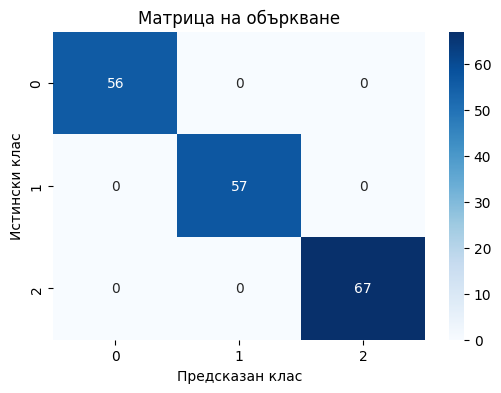

In [ ]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Предсказан клас')
plt.ylabel('Истински клас')
plt.title('Матрица на объркване')
plt.show()

## 🔁 Клъстеризация с KMeans + PCA

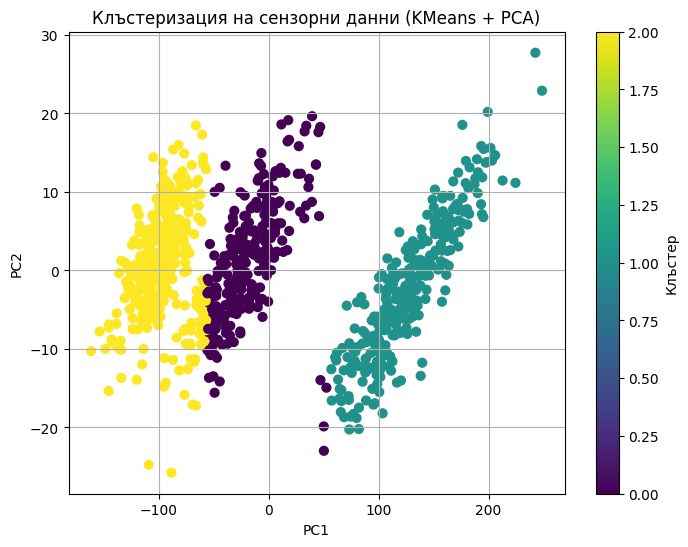

In [ ]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', s=40)
plt.title('Клъстеризация на сензорни данни (KMeans + PCA)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.colorbar(label='Клъстер')
plt.grid(True)
plt.show()